# Hall frequency

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

HALL_GALLONS_PER_TICK = 0.0009
HALL_TICKLIST_FILE = f'/Users/thomas/Desktop/abs_vs_rel/{[file for file in 
                                                          sorted(os.listdir('/Users/thomas/Desktop/abs_vs_rel/')) 
                                                          if 'hall_ticklist' in file][-1]}'
HALL_FILTERED_FILE = f''

In [8]:
def plot_freq(df, given_title):
    fig, ax = plt.subplots(1,1)
    ax2 = ax.twinx()
    ax.plot(df.timestamp, df.frequency)
    ax2.plot(df.timestamp, df.gpm)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency [Hz]')
    ax2.set_ylabel(f'GPM ({HALL_GALLONS_PER_TICK} gallons per tick)')
    ax.set_title(given_title)
    plt.tight_layout()
    plt.show()

### Ticklists

,timestamp,frequency,tick_delta_us,pico_pi_time_difference_ns
0,1.729494e+18,22.833686,0,2.519987e+13
1,1.729494e+18,24.104471,43795,2.519987e+13
2,1.729494e+18,30.078850,85281,2.519987e+13
3,1.729494e+18,32.215432,118527,2.519987e+13
4,1.729494e+18,32.190477,149568,2.519987e+13


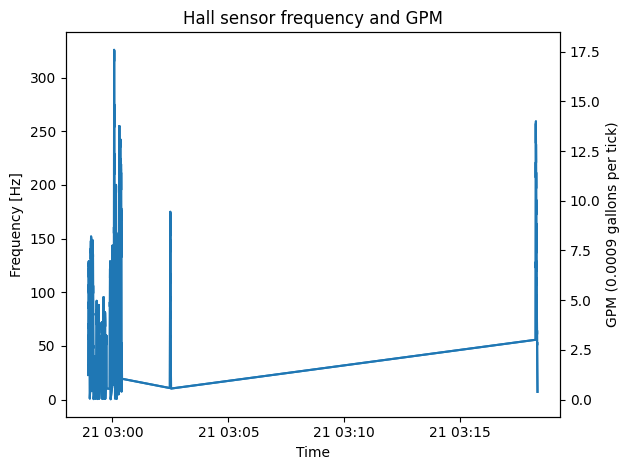

In [9]:
if os.path.exists(HALL_TICKLIST_FILE):
    
    df_ticklist = pd.read_csv(HALL_TICKLIST_FILE)
    display(df_ticklist.head())

    df_ticklist['timestamp'] = pd.to_datetime(list(df_ticklist['timestamp']), unit='ns', utc=True).tz_convert('America/New_York')
    df_ticklist['gpm'] = [x * HALL_GALLONS_PER_TICK * 60 for x in list(df_ticklist['frequency'])] 
    plot_freq(df_ticklist, "Hall sensor frequency and GPM")

### After filtering

In [10]:
if os.path.exists(HALL_FILTERED_FILE):

    df_filtered = pd.read_csv(HALL_FILTERED_FILE)
    display(df_filtered.head())

    df_filtered['timestamp'] = pd.to_datetime(list(df_filtered['timestamp']), unit='s', utc=True).tz_convert('America/New_York')
    df_filtered['gpm'] = [round(x * HALL_GALLONS_PER_TICK * 60, 2) for x in list(df_filtered['frequency'])] 
    
    plot_freq(df_filtered, "Filtered ticklists")

### Both

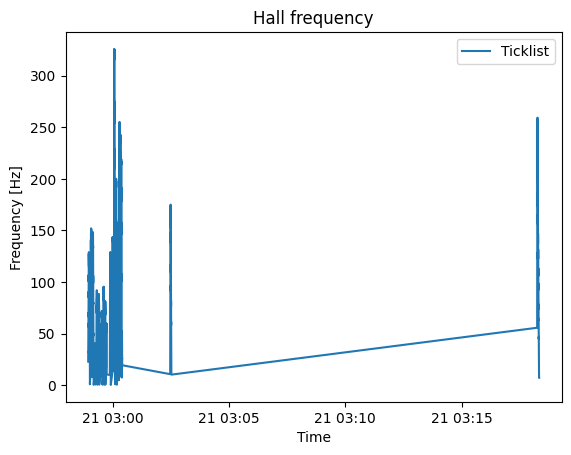

In [11]:
fig, ax = plt.subplots(1,1)
if os.path.exists(HALL_TICKLIST_FILE):
    ax.plot(df_ticklist.timestamp, df_ticklist.frequency, label='Ticklist')
if os.path.exists(HALL_FILTERED_FILE):
    ax.plot(df_filtered.timestamp, df_filtered.frequency, label='Filtered')
ax.set_title('Hall frequency')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency [Hz]')
ax.legend()
plt.show()